In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(13, 10)})

In [3]:
train_data = pd.read_csv('dengue_features_train.csv', parse_dates=['week_start_date'])
test_data = pd.read_csv('dengue_features_test.csv', parse_dates=['week_start_date'])
labels_train = pd.read_csv('dengue_labels_train.csv')

In [4]:
print(train_data.shape)
print(test_data.shape)
print(labels_train.shape)

(1456, 24)
(416, 24)
(1456, 4)


In [5]:
train_data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
848,sj,2006,33,2006-08-20,NaN,0.013900,0.223814,0.175300,3.19,300.910000,...,13.50,78.627143,3.19,18.327143,2.471429,28.642857,5.300000,32.2,24.4,1.5
176,sj,1993,37,1993-09-17,0.119900,0.097100,0.204443,0.186586,14.42,299.672857,...,50.00,81.794286,14.42,17.704286,1.942857,28.600000,7.371429,32.8,23.9,23.1
510,sj,2000,7,2000-02-19,0.193167,0.173140,0.163271,0.086886,0.00,297.745714,...,3.10,76.117143,0.00,14.618571,2.357143,25.200000,7.285714,30.0,21.1,3.8
1358,iq,2008,33,2008-08-12,0.430371,0.433014,0.436914,0.465729,26.03,297.214286,...,39.69,90.727143,26.03,16.847143,9.342857,27.900000,11.225000,34.8,19.8,11.0
1398,iq,2009,21,2009-05-21,0.331214,0.217200,0.209386,0.344514,66.46,297.724286,...,39.89,91.790000,66.46,17.585714,10.071429,28.350000,11.450000,34.6,21.4,50.5


In [6]:
train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [8]:
train_data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
train_data.duplicated().sum()

0

# Data Analysis and Preparation

In [10]:
train_data['ndvi_ne'].mean()

0.14229353741679882

In [11]:
print(train_data.describe())

              year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714  

In [12]:
city_means = train_data.groupby('city').median()
city_means

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,
iq,2005.0,26.5,0.263643,0.232971,0.249800,0.262143,60.47,297.822857,299.121429,295.852143,...,46.44,90.917143,60.47,17.428571,8.964286,27.600000,10.625000,34.0,21.3,45.30
sj,1999.0,26.5,0.057700,0.068075,0.177186,0.165971,20.80,299.254286,299.378571,295.464286,...,21.30,78.667857,20.80,16.845714,2.457143,27.228571,6.757143,31.7,22.8,17.75


In [13]:
train_data['city'][157] == 'sj'

True

In [14]:
# Replace null values with the median for each city for ndvi
def replacementFunc(df, columnname):
    df[columnname] = np.where(df[columnname].isnull(), 
                                              np.where(df['city'] == 'sj', city_means[columnname]['sj'], city_means[columnname]['iq']), 
                                              df[columnname])
        
replacementFunc(train_data, 'ndvi_ne')
replacementFunc(train_data, 'ndvi_nw')
replacementFunc(train_data, 'ndvi_se')
replacementFunc(train_data, 'ndvi_sw')
replacementFunc(train_data, 'precipitation_amt_mm')

In [15]:
train_data.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      0
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_max_air_temp_k                10
reanalysis_min_air_temp_k                10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg    10
reanalysis_tdtr_k                        10
station_avg_temp_c                       43
station_diur_temp_rng_c                  43
station_max_temp_c                       20
station_min_temp_c              

In [16]:
train_data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
12,sj,1990,30,1990-07-23,0.150567,0.171700,0.226900,0.214557,16.48,299.558571,...,42.53,80.742857,16.48,17.341429,2.071429,28.114286,6.357143,31.7,22.8,32.6
960,iq,2000,50,2000-12-16,0.338786,0.316829,0.350343,0.297700,111.06,298.757143,...,48.76,80.408571,111.06,16.098571,11.971429,26.616667,9.650000,33.8,21.0,67.2
1014,iq,2002,1,2002-01-01,0.405729,0.348400,0.368643,0.380014,70.16,297.132857,...,109.80,94.588571,70.16,17.618571,5.942857,27.950000,9.450000,33.2,23.0,45.3
1359,iq,2008,34,2008-08-19,0.283300,0.304471,0.274457,0.380500,12.88,299.228571,...,33.00,78.277143,12.88,15.998571,13.557143,28.000000,14.075000,38.6,19.2,7.9
1365,iq,2008,40,2008-09-30,0.393086,0.378271,0.343700,0.404843,24.28,299.178571,...,121.30,79.502857,24.28,16.331429,12.785714,NaN,NaN,36.0,19.6,1.0


In [17]:
# Replacement function

replacementFunc(train_data, 'reanalysis_air_temp_k')
replacementFunc(train_data, 'reanalysis_avg_temp_k')
replacementFunc(train_data, 'reanalysis_dew_point_temp_k')
replacementFunc(train_data, 'reanalysis_max_air_temp_k')
replacementFunc(train_data, 'reanalysis_min_air_temp_k')
replacementFunc(train_data, 'reanalysis_precip_amt_kg_per_m2')
replacementFunc(train_data, 'reanalysis_relative_humidity_percent')
replacementFunc(train_data, 'reanalysis_sat_precip_amt_mm')
replacementFunc(train_data, 'reanalysis_specific_humidity_g_per_kg')
replacementFunc(train_data, 'reanalysis_tdtr_k')
replacementFunc(train_data, 'station_avg_temp_c')
replacementFunc(train_data, 'station_diur_temp_rng_c')
replacementFunc(train_data, 'station_max_temp_c')
replacementFunc(train_data, 'station_min_temp_c')
replacementFunc(train_data, 'station_precip_mm')

In [18]:
train_data.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [19]:
train_labels_data = pd.concat([train_data, labels_train['total_cases']], axis=1)
train_labels_data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1063,iq,2002,50,2002-12-10,0.268029,0.142429,0.288671,0.185071,35.02,297.884286,...,92.614286,35.02,18.004286,7.928571,27.650000,9.450000,34.0,22.9,57.2,29
826,sj,2006,11,2006-03-19,0.010900,-0.014360,0.167100,0.157214,16.74,297.261429,...,73.210000,16.74,13.700000,2.614286,25.514286,6.185714,29.4,21.7,2.2,2
898,sj,2007,32,2007-08-06,0.015600,0.031050,0.134314,0.115857,37.75,301.170000,...,77.765714,37.75,18.407143,2.571429,28.614286,5.814286,31.7,24.4,6.4,72
834,sj,2006,19,2006-05-14,0.057700,0.053400,0.070543,0.082757,12.09,298.120000,...,75.927143,12.09,14.985714,2.357143,25.942857,5.071429,29.4,22.2,80.8,3
1306,iq,2007,33,2007-08-13,0.266667,0.271933,0.243886,0.196457,36.78,298.091429,...,80.935714,36.78,15.565714,9.714286,26.900000,11.000000,33.1,21.3,76.5,2


# Data Visualization

In [20]:
labels_train.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

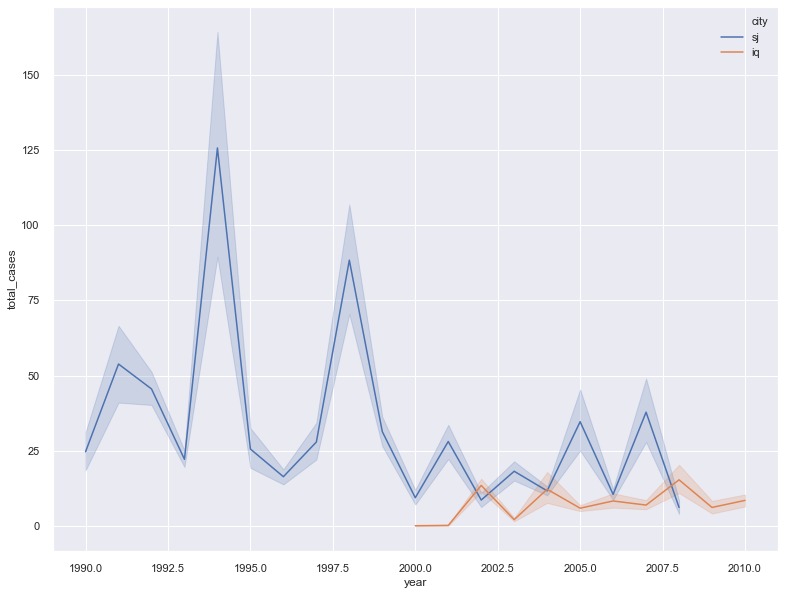

In [21]:
sns.lineplot(x = 'year', y='total_cases',
            hue='city', data=train_labels_data)

In [22]:
train_labels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysi

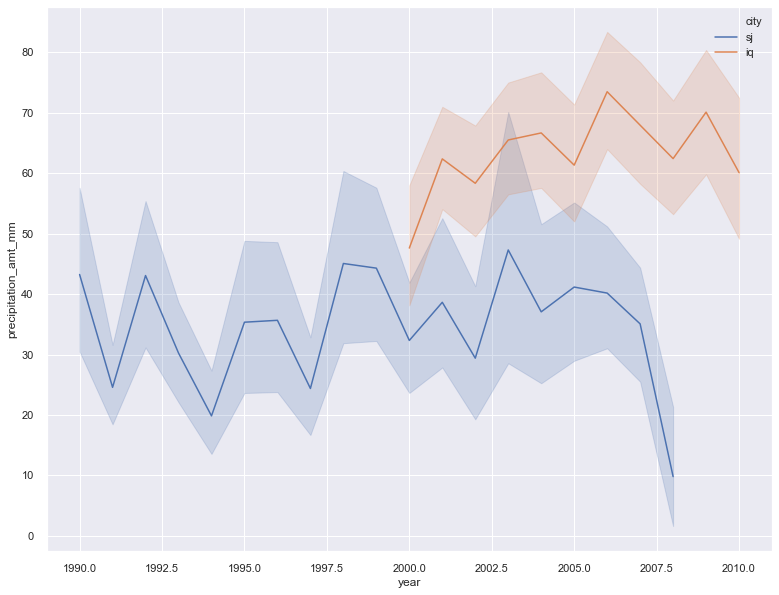

In [23]:
sns.lineplot(x = 'year', y='precipitation_amt_mm',
            hue='city', data=train_labels_data)

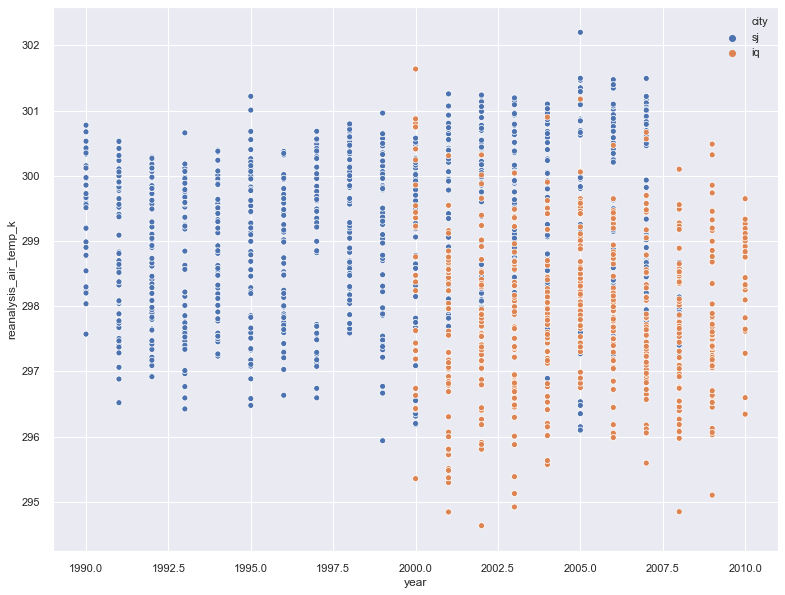

In [24]:
ax = sns.scatterplot(x = 'year', y = 'reanalysis_air_temp_k',
                    hue='city', data=train_labels_data)

# Feature Engineering

In [25]:
def extract_date(df, column):
    df[column+"_day"] = df[column].apply(lambda x: x.day)
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    df[column+"_year"] = df[column].apply(lambda x: x.year)

extract_date(train_labels_data, 'week_start_date')
train_labels_data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date_day,week_start_date_month,week_start_date_year
989,iq,2001,28,2001-07-09,0.359717,0.311057,0.264986,0.438843,39.09,295.808571,...,9.700000,27.350000,10.950000,33.5,19.5,22.3,0,9,7,2001
801,sj,2005,38,2005-09-24,0.025200,-0.059333,0.155429,0.178029,66.86,301.495714,...,3.571429,28.585714,6.657143,32.2,24.4,15.1,82,24,9,2005
35,sj,1991,1,1991-01-01,0.146500,0.140467,0.151500,0.167314,0.00,297.060000,...,2.528571,24.385714,7.457143,29.4,18.9,5.3,21,1,1,1991
832,sj,2006,17,2006-04-30,0.035100,0.035100,0.115886,0.086786,103.35,298.898571,...,3.271429,26.314286,6.114286,30.6,22.8,75.2,3,30,4,2006
1183,iq,2005,13,2005-04-02,0.381686,0.368314,0.383771,0.366657,55.12,297.370000,...,7.628571,28.250000,10.850000,34.3,20.8,73.9,13,2,4,2005


In [26]:
cat_cols = ['city']

train_labels_data = pd.get_dummies(train_labels_data, columns=cat_cols)

train_labels_data.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date_day,week_start_date_month,week_start_date_year,city_iq,city_sj
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,6.900000,29.4,20.0,16.0,4,30,4,1990,0,1
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,6.371429,31.7,22.2,8.6,5,7,5,1990,0,1
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,6.485714,32.2,22.8,41.4,4,14,5,1990,0,1
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,6.771429,33.3,23.3,4.0,3,21,5,1990,0,1
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,9.371429,35.0,23.9,5.8,6,28,5,1990,0,1


# Feature Selection

In [27]:
test_data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
220,sj,2012,29,2012-07-22,NaN,-0.043367,0.114060,0.121800,17.72,300.580000,...,5.00,80.305714,17.72,18.262857,2.514286,29.042857,5.471429,32.8,25.6,13.2
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
101,sj,2010,14,2010-04-09,-0.073000,-0.056133,0.234129,0.185686,11.01,298.801429,...,6.85,72.200000,11.01,14.924286,2.857143,26.771429,6.757143,33.9,22.2,0.0
77,sj,2009,43,2009-10-22,-0.079067,-0.128450,0.272243,0.227814,5.52,300.831429,...,18.70,79.312857,5.52,18.424286,2.542857,28.985714,6.342857,33.3,24.4,18.6
394,iq,2013,5,2013-01-29,0.368857,0.375329,0.336871,0.418014,43.53,297.625714,...,88.60,92.512857,43.53,17.618571,7.600000,26.700000,6.450000,33.3,23.2,51.3


In [28]:
test_data.shape

(416, 24)

In [29]:
y = train_labels_data['total_cases']

x = train_labels_data.drop(['week_start_date', 'total_cases'], axis=1)

x.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month,week_start_date_year,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,25.442857,6.900000,29.4,20.0,16.0,30,4,1990,0,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,26.714286,6.371429,31.7,22.2,8.6,7,5,1990,0,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.714286,6.485714,32.2,22.8,41.4,14,5,1990,0,1
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,27.471429,6.771429,33.3,23.3,4.0,21,5,1990,0,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,28.942857,9.371429,35.0,23.9,5.8,28,5,1990,0,1


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

x_train.shape, x_test.shape

((1164, 27), (292, 27))

In [31]:
# Linear Regression

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

In [32]:
def printMetrics(algo, testdata, predata):
    mae = metrics.mean_absolute_error(testdata, predata)
    mse = metrics.mean_squared_error(testdata, predata)
    rmse = np.sqrt(metrics.mean_absolute_error(testdata, predata))
    r2 = metrics.r2_score(testdata, predata)
    
    print(algo)
    print('Mean absolute error: ', mae)
    print('Mean Squared error: ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Score: ', r2)

In [33]:
printMetrics('Linear Regression', y_test, y_pred_lr)

Linear Regression
Mean absolute error:  19.812674805627076
Mean Squared error:  954.1800556845
Root Mean Squared Error:  4.45114308977223
R2 Score:  0.10331860796014136


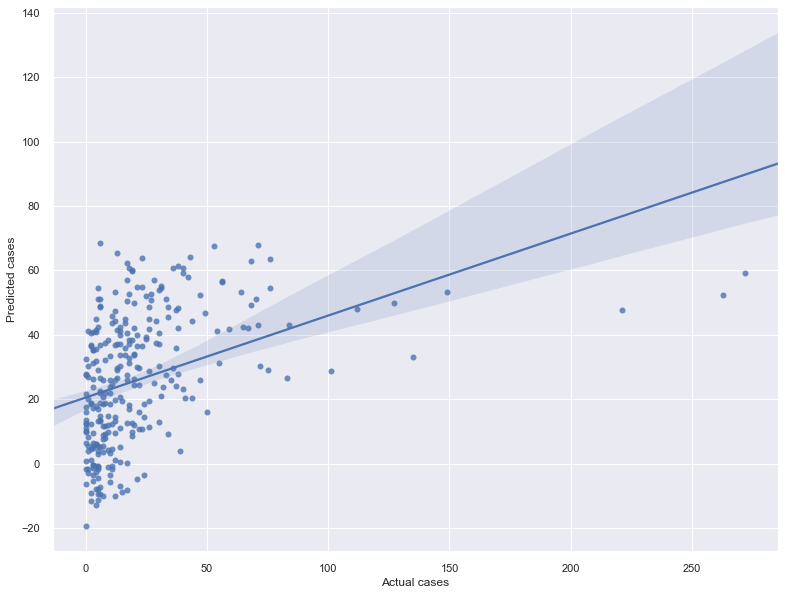

In [34]:
ax = sns.regplot(x = y_test, y = y_pred_lr)
ax.set(xlabel = 'Actual cases',
      ylabel = 'Predicted cases')
plt.show()

[-1.2038453345221307, -0.6597671153871925, -0.40220221357898667, -0.291787205531012, -0.29160627335243006, -0.22905301871149164, -0.17253940405121204, -0.08984976087014385, -0.09064292371153426, -0.06702744106740632, -0.07405510831494744, -0.023713228519114615, -0.04021922196473193, -0.033878443099025546, -0.05640180750053814, -0.04746094152974889, -0.04374418525122237, -0.002452045182980367, 0.00176998148503138, 0.005243965775221349]


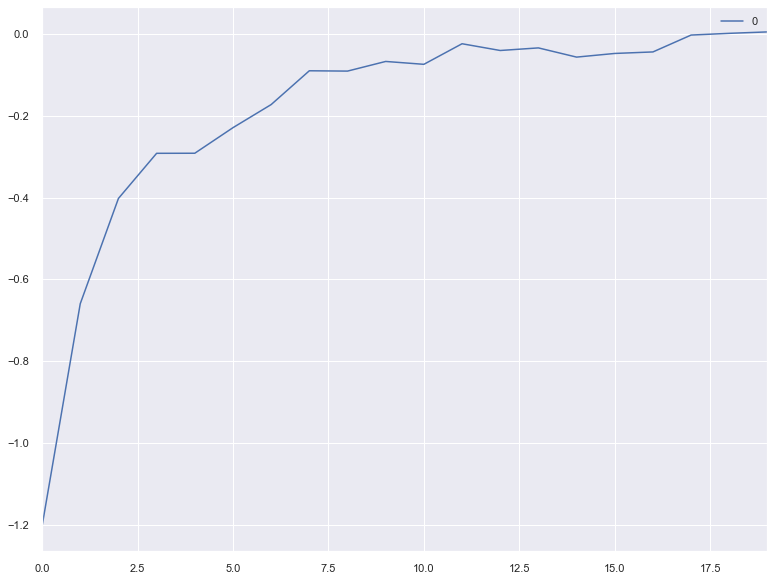

In [35]:
r2_score = []

for k in range(20):
    k = k + 1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    r2_value = metrics.r2_score(y_test, pred)
    r2_score.append(r2_value)

print(r2_score)
pd.DataFrame(r2_score).plot()

In [36]:
# Random Forest

rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [37]:
printMetrics("Random Forest", y_test, y_pred_rf)

Random Forest
Mean absolute error:  14.282773972602739
Mean Squared error:  660.7228941780821
Root Mean Squared Error:  3.779255743212245
R2 Score:  0.37909211057739467


# Predicting Test Data

In [38]:
test_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [39]:
test_data.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [40]:
replacementFunc(test_data, 'ndvi_ne')
replacementFunc(test_data, 'ndvi_nw')
replacementFunc(test_data, 'ndvi_se')
replacementFunc(test_data, 'ndvi_sw')
replacementFunc(test_data, 'precipitation_amt_mm')
replacementFunc(test_data, 'reanalysis_air_temp_k')
replacementFunc(test_data, 'reanalysis_avg_temp_k')
replacementFunc(test_data, 'reanalysis_dew_point_temp_k')
replacementFunc(test_data, 'reanalysis_max_air_temp_k')
replacementFunc(test_data, 'reanalysis_min_air_temp_k')
replacementFunc(test_data, 'reanalysis_precip_amt_kg_per_m2')
replacementFunc(test_data, 'reanalysis_relative_humidity_percent')
replacementFunc(test_data, 'reanalysis_sat_precip_amt_mm')
replacementFunc(test_data, 'reanalysis_specific_humidity_g_per_kg')
replacementFunc(test_data, 'reanalysis_tdtr_k')
replacementFunc(test_data, 'station_avg_temp_c')
replacementFunc(test_data, 'station_diur_temp_rng_c')
replacementFunc(test_data, 'station_max_temp_c')
replacementFunc(test_data, 'station_min_temp_c')
replacementFunc(test_data, 'station_precip_mm')

In [41]:
test_data.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null datetime64[ns]
ndvi_ne                                  416 non-null float64
ndvi_nw                                  416 non-null float64
ndvi_se                                  416 non-null float64
ndvi_sw                                  416 non-null float64
precipitation_amt_mm                     416 non-null float64
reanalysis_air_temp_k                    416 non-null float64
reanalysis_avg_temp_k                    416 non-null float64
reanalysis_dew_point_temp_k              416 non-null float64
reanalysis_max_air_temp_k                416 non-null float64
reanalysis_min_air_temp_k                416 non-null float64
reanalysis_precip_amt_kg_

In [43]:
extract_date(test_data, 'week_start_date')

In [44]:
test_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month,week_start_date_year
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,29,4,2008
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,6,5,2008
2,sj,2008,20,2008-05-13,-0.0015,0.068075,0.151083,0.091529,3.66,299.455714,...,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,13,5,2008
3,sj,2008,21,2008-05-20,0.0577,-0.019867,0.124329,0.125686,0.00,299.690000,...,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,20,5,2008
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,27,5,2008


In [45]:
cat_cols = ['city']

city_col = test_data['city']

test_data = pd.get_dummies(test_data, columns=cat_cols)

In [46]:
test_data.drop('week_start_date', axis=1, inplace=True)

In [47]:
test_data.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month,week_start_date_year,city_iq,city_sj
0,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,26.528571,7.057143,33.3,21.7,75.2,29,4,2008,0,1
1,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,...,26.071429,5.557143,30.0,22.2,34.3,6,5,2008,0,1
2,2008,20,-0.0015,0.068075,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,...,27.928571,7.785714,32.8,22.8,3.0,13,5,2008,0,1
3,2008,21,0.0577,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,...,28.057143,6.271429,33.3,24.4,0.3,20,5,2008,0,1
4,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,...,27.614286,7.085714,33.3,23.3,84.1,27,5,2008,0,1


In [48]:
prediction_rf = rf.predict(test_data)

In [49]:
prediction_rf.round(0)

array([  5.,   5.,   6.,   7.,  10.,  11.,  13.,  16.,  22.,  19.,  16.,
        23.,  31.,  32.,  37.,  46.,  39.,  47.,  57.,  52.,  43.,  29.,
        29.,  36.,  29.,  24.,  22.,  28.,  29.,  29.,  23.,  22.,  13.,
        18.,  22.,  16.,  15.,  14.,  12.,  13.,  11.,  12.,   9.,  12.,
         6.,   6.,   5.,   5.,   5.,   5.,   6.,   5.,   5.,   5.,   7.,
         4.,  10.,  10.,  10.,  15.,  14.,  30.,  32.,  32.,  30.,  35.,
        45.,  40.,  44.,  60.,  58.,  34.,  66.,  42.,  62.,  53.,  63.,
        57.,  42.,  23.,  27.,  27.,  31.,  22.,  19.,  18.,  23.,  17.,
        15.,  15.,  16.,  15.,  10.,  14.,  14.,  13.,  13.,  10.,   7.,
        12.,  12.,   8.,   6.,   6.,  12.,  16.,   9.,  13.,  14.,  28.,
        29.,  45.,  19.,  22.,  39.,  41.,  26.,  26.,  44.,  66.,  53.,
        62., 100.,  80.,  53.,  53.,  48.,  40.,  74.,  51.,  54.,  29.,
        32.,  25.,  23.,  21.,  28.,  17.,  14.,  18.,  14.,  14.,  15.,
        14.,  12.,  12.,  12.,  12.,   7.,   6.,   

In [50]:
test_data.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'week_start_date_day',
       'week_start_date_month', 'week_start_date_year', 'city_iq', 'city_sj'],
      dtype='object')

In [51]:
submission_csv = pd.read_csv('submission_format.csv')
submission_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [62]:
submission_csv['total_cases'] = prediction_rf.round(0).astype(int)

In [63]:
submission_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,5
1,sj,2008,19,5
2,sj,2008,20,6
3,sj,2008,21,7
4,sj,2008,22,10


In [65]:
submission_csv.to_csv('Submission_file.csv', index=False)